# CRS, datum and projections

Purpose of this notebook is to explain some basic concepts about geospatial data such as: CRS, datum and projections.

Let's first of all define what is geospatial Data:

Geospatial data refers to any data that is associated with a specific geographic location on the Earth's surface such as points, lines, rasters, etc…
Geospatial data can be very helpful to describe, analyze, and visualize various aspects of the world allowing to identify patterns, potential threats and make data-driven decisions.

Let's first of all introduce what is a CRS.

A **CRS** (Coordinate Reference System) is a standardized way to describe locations on the Earth's surface. 
It allows to define geographic coordinates on a map. The definition of a CRS includes:
- ***coordinate system*** (set of rules e.g. projection equations for specifying how the coordinates are to be assigned to the points) 
- a ***datum***. It defines how the CRS is related to the earth (position of the origin, the scale and the orientation of coordinate axis)

source: https://www.crs-geo.eu/definition-crs.htm#:~:text=A%20Coordinate%20Reference%20System%20contains,datum%20and%20the%20coordinate%20system.

Two of the most known CRS are the WGS 84 (used by GPS) and UTM (Universal Transverse Mercator).


Now that we've introduced this first concepts let's start to create some visualization with python.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from cartopy import crs as ccrs, feature as cfeature

## Projections

As said in the introduction projection are very important for the definition of a coordinate reference system.
Let's display some of them with the help of Cartopy and Matplot libs.

In [2]:
# List of map projections to display
projections = [
    ccrs.PlateCarree(),  # Plate Carrée projection (default)
    ccrs.Mercator(),     # Mercator projection
    ccrs.Robinson(),     # Robinson projection
    ccrs.Orthographic(), # Orthographic projection
]

# name of each projection to be shown in the plots
titles = [
    "PlateCarree Projection",
    "Mercator Projection",
    "Robinson Projection",
    "Orthographic Projection"
]

C:\Users\degas\AppData\Local\Temp\ipykernel_7188\773118562.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 2, i + 1, projection=proj)
C:\Users\degas\AppData\Local\Temp\ipykernel_7188\773118562.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 2, i + 1, projection=proj)
C:\Users\degas\AppData\Local\Temp\ipykernel_7188\773118562.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 2, i + 1, projection=proj)


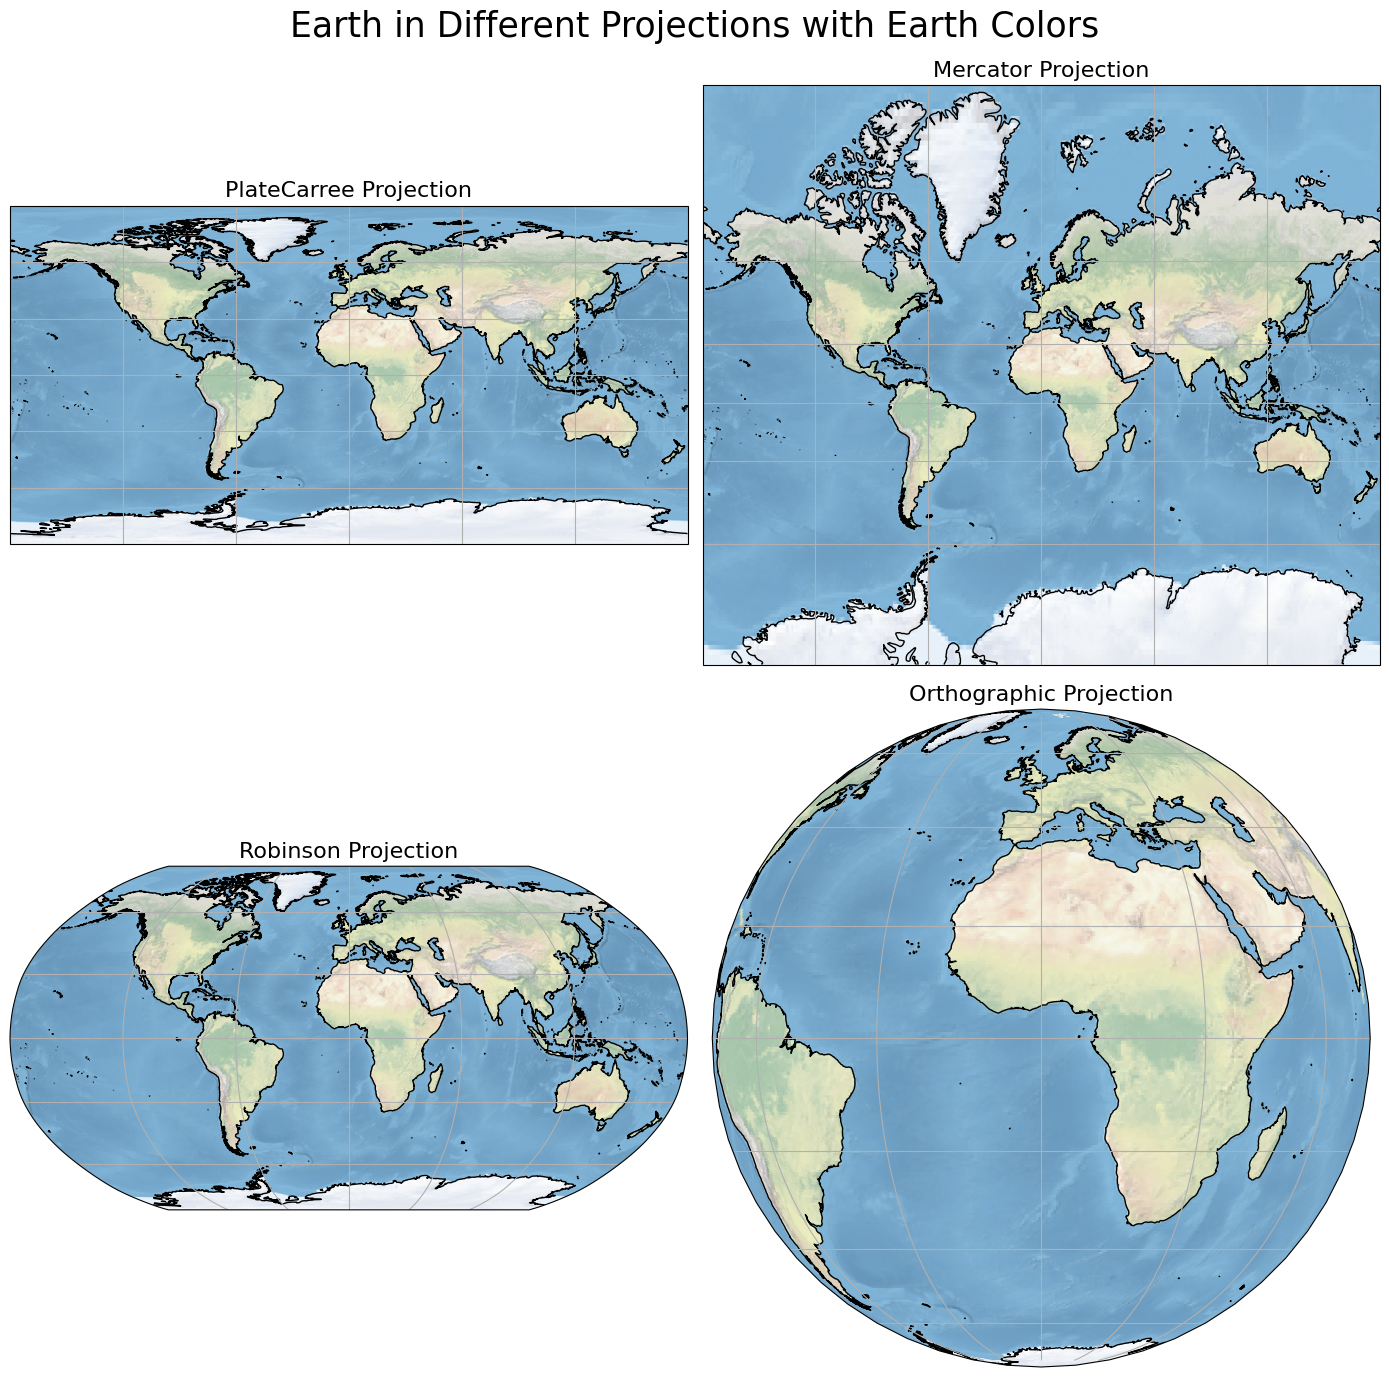

In [3]:
# Create a figure with subplots for each projection
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
fig.suptitle('Earth in Different Projections with Earth Colors', fontsize=25)

# Loop through the projections and add them to the subplots
for i, proj in enumerate(projections):
    ax = axes[i // 2, i % 2]
    ax = plt.subplot(2, 2, i + 1, projection=proj)
    ax.coastlines(resolution='50m')
    ax.gridlines()
    ax.set_title(titles[i], fontsize=16)  # Set subplot title
    
    ax.stock_img()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Here some features of each of the projections

**Plate Carrée Projection**

The Plate Carrée projection is an equidistant cylindrical projection that maps meridians and parallels as straight lines, resulting in a grid-like appearance. The distances are true along meridians and equator but the distortions increase at high latitudes moving away from the equator.
The projection is neither equal area nor conformal (conformal=every angle between two curves that cross each other on Earth (a sphere or an ellipsoid) is preserved in the image of the projection).

**Mercator Projection**

Mercator is a cylindrical projection. The meridians are vertical lines, parallel to each other, and equally spaced, and they extend to infinity when approaching the poles. The lines of latitude are horizontal straight lines, perpendicular to the meridians and the same length as the equator, but they become farther apart toward the poles.
The Mercator projection is conformal, meaning it preserves angles and shapes. This property is particularly useful for navigation because it ensures that all straight lines on the map represent constant compass directions.

**Robinson Projection**

The Robinson projection minimizes distortion across the entire world.
Distortion in shape, area, and distance is moderate but still present. It is ideal for world maps and thematic maps where a balanced representation is important.

**Orthographic Projection**

The Orthographic projection is a perspective projection that shows the Earth as viewed from an infinite distance. It provides a 3D-like, spherical view with the central point as the "center of projection." The distortion increases from center making it not suited for full-world maps.

# Create regional maps

We can generate regional maps by using the cartopy set_extent method

In [4]:
projPC = ccrs.PlateCarree() # let's define the Plate Carrée Projection
lonW = -50
lonE = 50
latS = -40
latN = 40
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2
res = '110m'

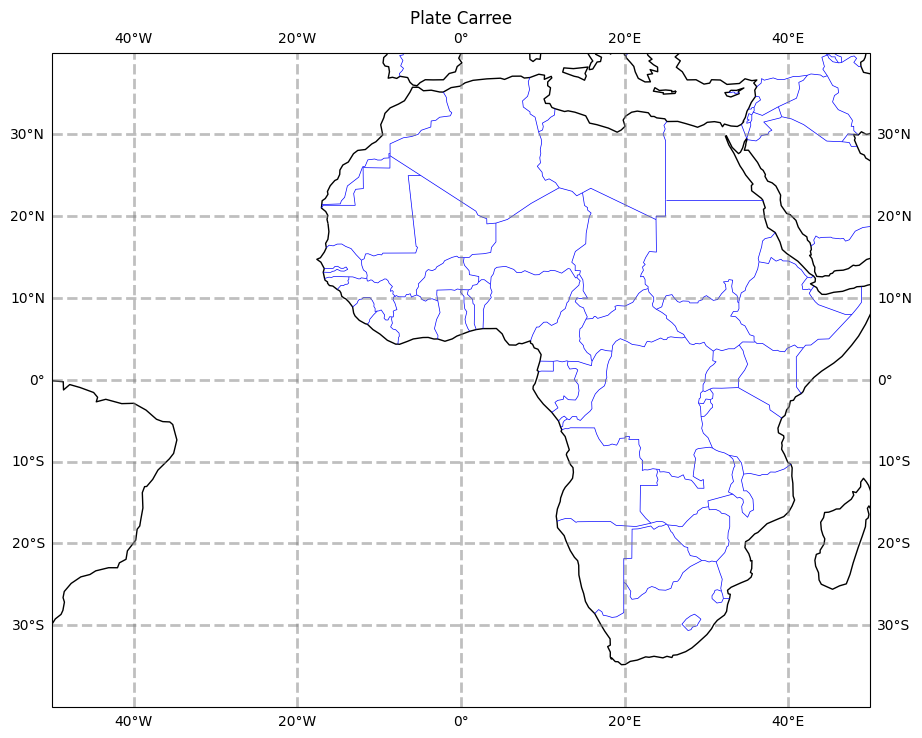

In [5]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.set_title('Plate Carree')
gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
) # define lines
ax.set_extent([lonW, lonE, latS, latN], crs=projPC) # set extent
ax.coastlines(resolution=res, color='black')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');

In [6]:
# add details

Text(0.5, 1.0, 'Central Africa')

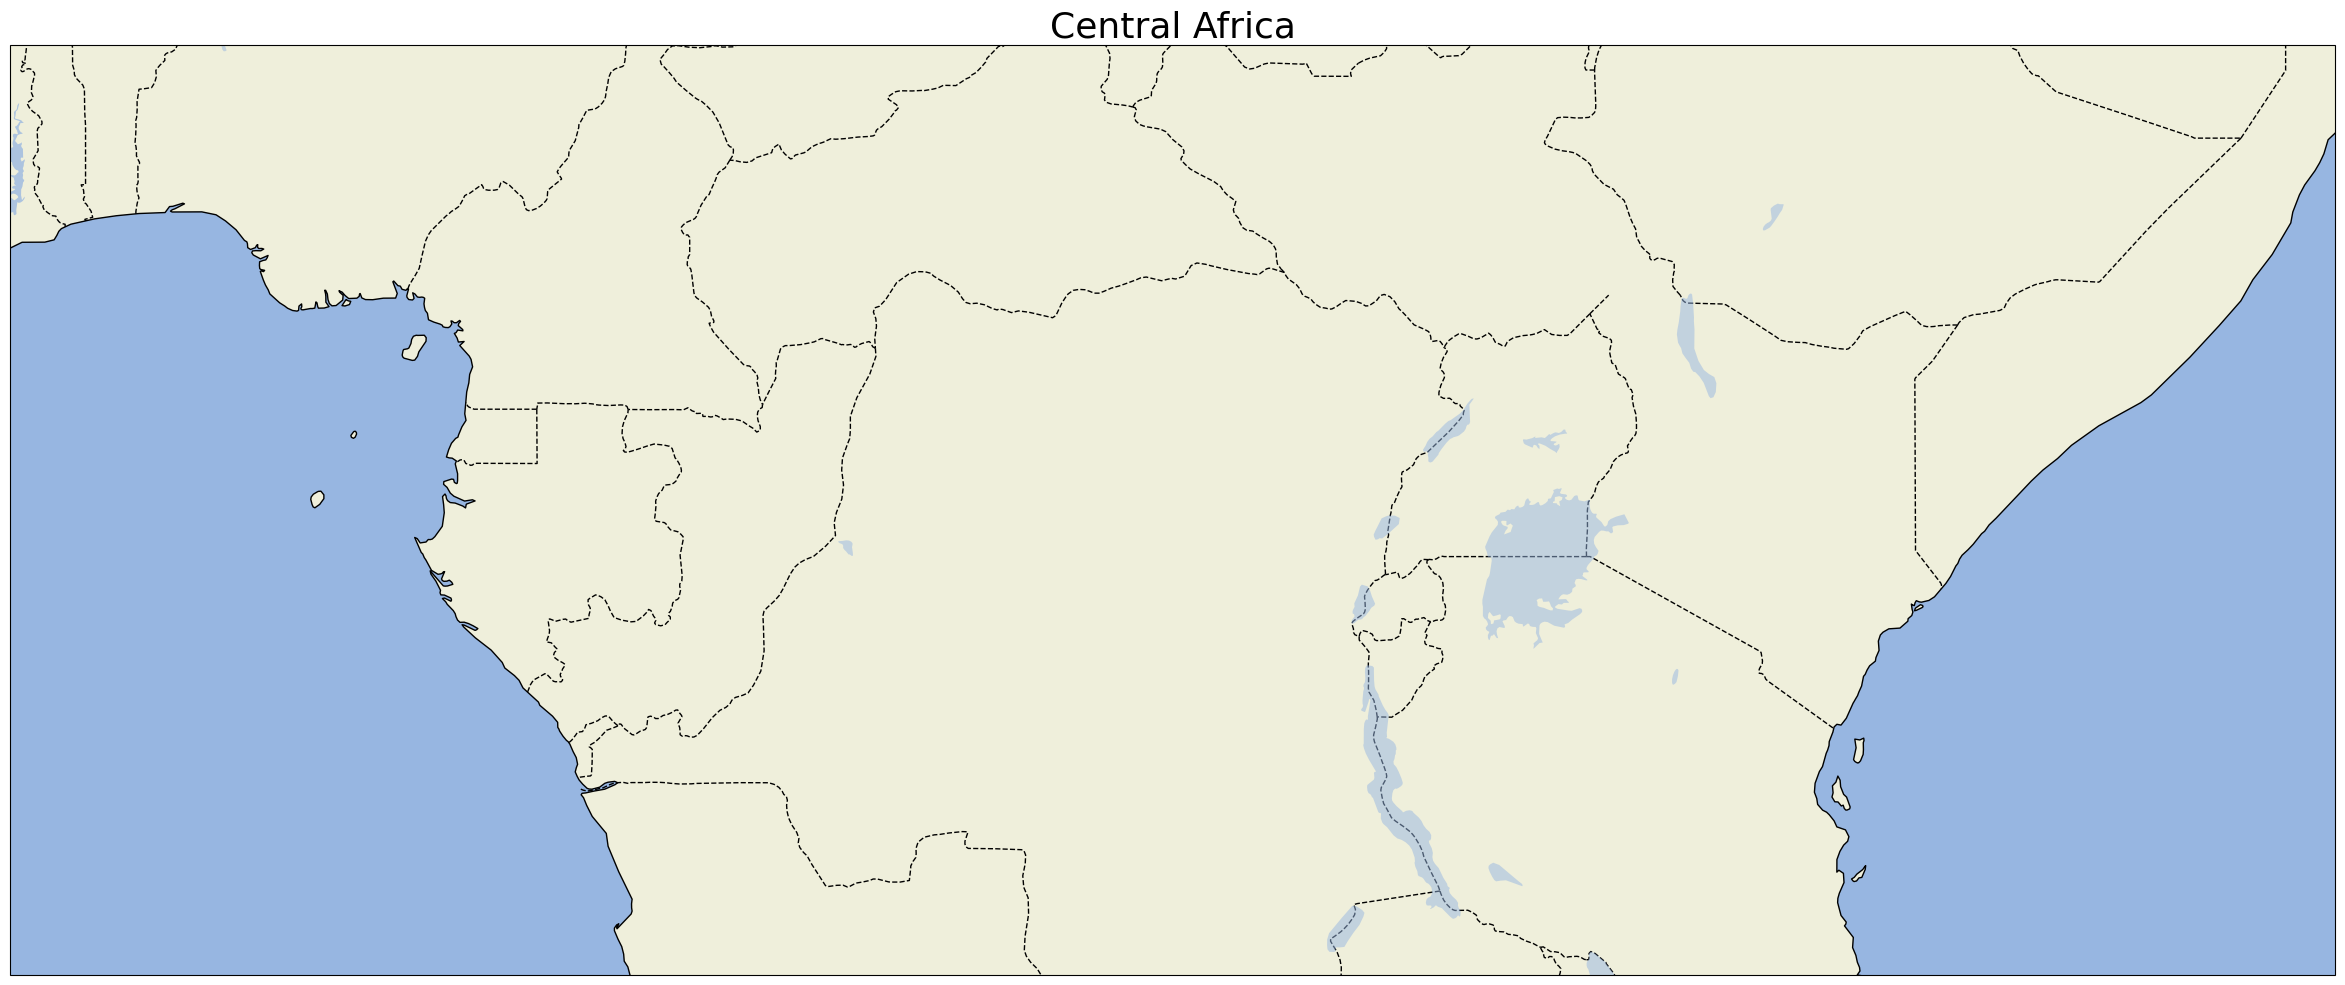

In [7]:
# Create the figure object
fig = plt.figure(
    figsize=(30, 24)
)

# Set the domain for defining the second plot region.
lonW = 0
lonE = 50
latS = -10
latN = 10
cLat = (latN + latS) / 2
cLon = (lonW + lonE) / 2

# subplot
ax = plt.subplot(projection=projPC)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
ax.set_facecolor(cfeature.COLORS['water'])
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='--')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES)
ax.set_title('Central Africa', fontsize = 26)

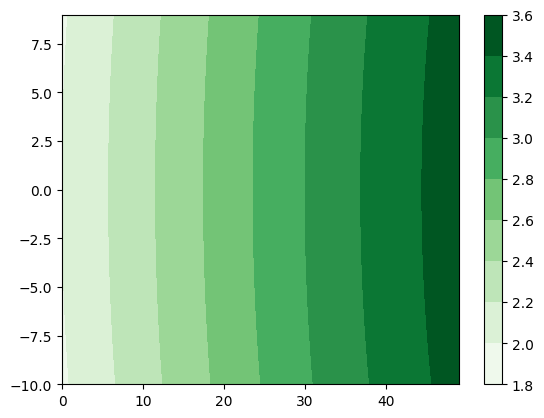

In [12]:
# plot some fake data
lon, lat = np.mgrid[lonW:lonE, latS:latN]
data = 2 * np.sin(np.deg2rad(lon)) + 2 * np.cos(np.deg2rad(lat))
# let's create a simple 2D plot to see data we're going to show on the map
plt.set_cmap('Greens')
plt.contourf(lon, lat, data)
plt.colorbar()

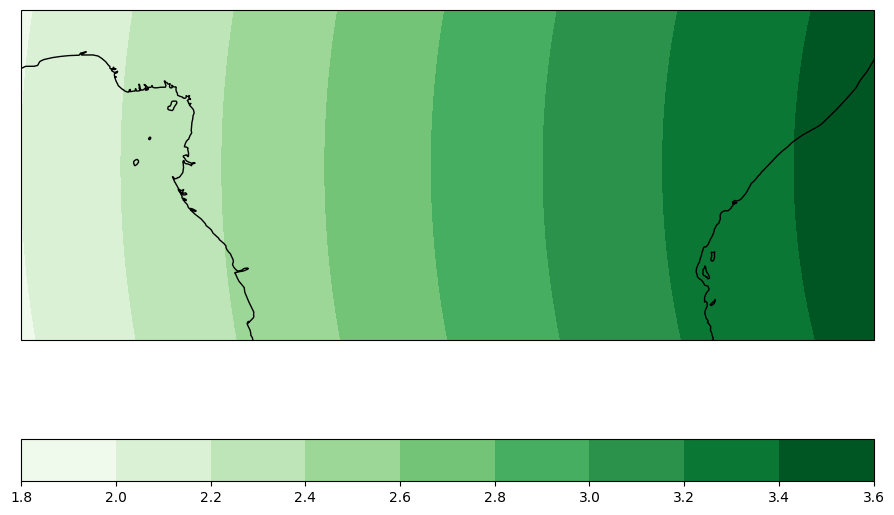

In [13]:
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projPC)
ax.coastlines()
dataplot = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())
plt.colorbar(dataplot, orientation='horizontal');